In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 436 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 172s 12s/step - loss: 0.5067 - accuracy: 0.7569 - val_loss: 0.4026 - val_accuracy: 0.8417
Epoch 2/10
14/14 [==============================] - 37s 3s/step - loss: 0.2994 - accuracy: 0.8945 - val_loss: 0.2176 - val_accuracy: 0.9014
Epoch 3/10
14/14 [==============================] - 37s 3s/step - loss: 0.2502 - accuracy: 0.8945 - val_loss: 0.1912 - val_accuracy: 0.9220
Epoch 4/10
14/14 [==============================] - 36s 3s/step - loss: 0.1798 - accuracy: 0.9243 - val_loss: 0.1941 - val_accuracy: 0.9060
Epoch 5/10
14/14 [==============================] - 37s 3s/step - loss: 0.1949 - accuracy: 0.9106 - val_loss: 0.1226 - val_accuracy: 0.9587
Epoch 6/10
14/14 [==============================] - 37s 3s/step - loss: 0.1297 - accuracy: 0.9495 - val_loss: 0.0977 - val_accuracy: 0.9702
Epoch 7/10
14/14 [==============================] - 37s 3s/step - loss: 0.1110 - accuracy: 0.9656 - val_loss: 0.1029 - val_accuracy: 0.9633
Epoch 8/10
14/14 [

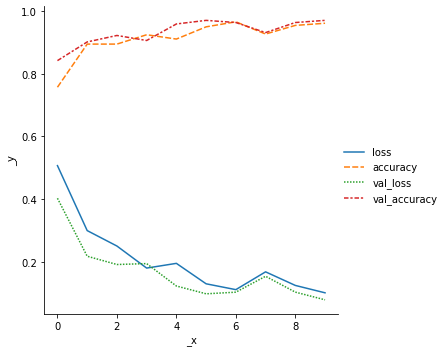

In [7]:
import seaborn as plt

plt.relplot(data=r.history, kind="line")

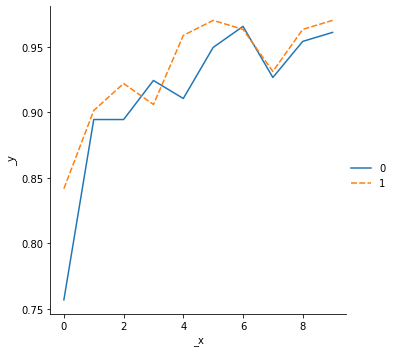

In [8]:
import seaborn as plt

plt.relplot(data=[r.history["accuracy"],r.history["val_accuracy"]], kind="line")

In [9]:
import matplotlib.pyplot as plt
import random

def predictImage(filename, message = False):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 0:
      if message: sendMessage("Fire Detected")
      return plt.xlabel("NO FIRE",fontsize=30)
    elif val == 1:
        return plt.xlabel("FIRE",fontsize=30)

In [10]:
def loadAndPredictImage(className):
  local_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/test_set/" + className + "/"
  files = []
  for filename in os.listdir(local_path):
      if filename.endswith("jpg"): 
          files.append(local_path+filename)

  ran = random.choice(files)
  predictImage(ran)

1/1 [==============================] - 0s 214ms/step
[[1.]]


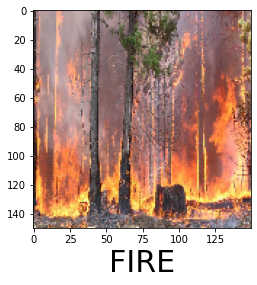

In [11]:
loadAndPredictImage("with fire")

In [12]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 13.8 MB/s 


In [13]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=fe340f989b2bfbd6b3654427bee02145dce632074cbe314e0277a71d547a4b9d
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [14]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [18]:
account_sid='AC153547ffc4b3e54ca16bdde837205672'
auth_token = '59a47252bf7d5bc7c26e39195f29cf10'
client = Client(account_sid,auth_token)




In [ ]:
from google.colab.patches import cv2_imshow


#define video from file
video=cv2.VideoCapture("/content/pexels-everett-bumstead-5423085.mp4") 
#define the features 
name=['forest','with fire']

while(1):
    success, frame= video.read() 
    cv2.imwrite("image.jpg",frame)
    img=image.load_img("image.jpg",target_size=(150,150)) 
    x=image.img_to_array(img) 
    x=np.expand_dims(x,axis=0)
    pred=model.predict(x) 
    print(pred[0])
    cv2.putText(frame,"predicted class="+str(name[int(pred[0])]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,0), 1) 
    
    if pred[0]==1:
       account_sid='AC153547ffc4b3e54ca16bdde837205672'
       auth_token = '59a47252bf7d5bc7c26e39195f29cf10'
       client = Client(account_sid,auth_token)
      
      # sendMessage("Forest Fire is detected, stay alert")
       
       print('Fire Detected') 
       print('SMS sent!')
    else:
      print('No Danger') 
video.release() 
cv2.destryoAllWindows()

In [30]:

 
account_sid='AC153547ffc4b3e54ca16bdde837205672'
auth_token = '59a47252bf7d5bc7c26e39195f29cf10'
client = Client(account_sid,auth_token)


def sendMessage(message):
  for i in numbers:
    message = client.messages.create(messaging_service_sid=os.getenv("twilio_messagin_service_sid"), 
                                  body=message,        
                                  to=i, 
                              ) 
    print("SENT TO :",message.sid)

1/1 [==============================] - 0s 28ms/step
[[1.]]


Text(0.5, 0, 'FIRE')

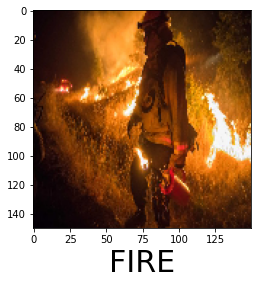

In [32]:
img = "/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg" # PASS THE IMAGE FILE HERE
predictImage(img, True)